# **Simple [Egyptian Hieroglyphs](https://www.kaggle.com/datasets/alexandrepetit881234/egyptian-hieroglyphs)  Classification Pipeline**
---
1. **Purpose**: To classify Egyptian Hieroglyph symbols in images accurately, using modern image recognition techniques. By utilizing pre-trained models like MobileNetV2 and VGG16.
2. **Dataset**: Contains images of Egyptian Hieroglyphs organized into 92 classes, sorted into training, validation, and test sets.

3. **Preprocessing**: Prepared the images by resizing, normalizing, and augmenting them to improve model performance and prevent overfitting.

4. **Modeling**: Trained several Convolutional Neural Networks (CNNs) including custom architectures and pre-trained MobileNetV2 and VGG16 models, using batch normalization, dropout, and fine-tuning for better results.

5. **Evaluation**: Measured accuracy, precision, recall, F1-score, and top-5 accuracy to understand the model's performance on the validation and test data.

# **Preprocessing Egyptian Hieroglyphs Dataset**

In [ ]:
import os
import shutil
from pathlib import Path
import re

In [ ]:
print("Setting up Kaggle...")
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Setting up Kaggle...
cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
print("Downloading dataset...")
!kaggle datasets download alexandrepetit881234/egyptian-hieroglyphs -q
print("Extracting dataset...")
!unzip -q egyptian-hieroglyphs.zip


Dataset URL: https://www.kaggle.com/datasets/alexandrepetit881234/egyptian-hieroglyphs
License(s): Attribution 4.0 International (CC BY 4.0)
Extracting dataset...


In [ ]:
# Create a main folder called "Egyptian Hieroglyphs"
main_folder = "/content/Egyptian Hieroglyphs"
os.makedirs(main_folder, exist_ok=True)

shutil.move("/content/train", os.path.join(main_folder, "train"))
shutil.move("/content/test", os.path.join(main_folder, "test"))
shutil.move("/content/valid", os.path.join(main_folder, "valid"))


'/content/Egyptian Hieroglyphs/valid'

In [ ]:
folders = ['train', 'test', 'valid']

# Loop through each folder
for folder in folders:
    folder_path = os.path.join(main_folder, folder)

    # Get list of image files from the folder
    image_files = [f for f in os.listdir(folder_path)
                   if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Extract class names from filenames
    class_files = {}
    for image_file in image_files:
        match = re.match(r"([^-]+)", image_file)
        class_name = match.group(1) if match else None
        if class_name:
            if class_name not in class_files:
                class_files[class_name] = []
            class_files[class_name].append(image_file)

    # Create folders for each class and move files
    for class_name, files in class_files.items():
        class_dir = os.path.join(folder_path, class_name)
        os.makedirs(class_dir, exist_ok=True)

        for file in files:
            src_path = os.path.join(folder_path, file)
            dst_path = os.path.join(class_dir, file)
            shutil.move(src_path, dst_path)

    print(f"\nProcessed {folder} folder: Organized {len(image_files)} images into {len(class_files)} classes")
    print(f"Classes found in {folder}: {', '.join(sorted(class_files.keys()))}")


print("\nOrganization complete!")



Processed train folder: Organized 2723 images into 92 classes
Classes found in train: 100, Her, Woman, among, angry, ankh, aroura, at, bad, bandage, bee, belongs, birth, board, book, boy, branch, bread, brewer, builder, bury, canal, cloth, cobra, composite_bow, cooked, corpse, dessert, divide, duck, elephant, enclosed, eye, fabric, face, falcon, fingre, fish, flail, folded, foot, galena, giraffe, he, hit, horn, king, leg, length, life, limits, lion, lizard, loaf, man, mascot, meet, mother, mouth, musical, nile, not, now, nurse, nursing, occur, one, owl, pair, papyrus, pool, quailchick, reed, ring, rope, ruler, sail, sandal, semen, small, snake, soldier, star, stick, swallow, this, to, turtle, viper, wall, water, you

Processed test folder: Organized 389 images into 91 classes
Classes found in test: 100, Her, Woman, among, angry, ankh, aroura, at, bad, bandage, bee, belongs, birth, board, book, boy, branch, bread, brewer, builder, bury, canal, cloth, cobra, composite_bow, cooked, corps

In [ ]:
import os
import re
from collections import defaultdict

main_folder = '/content/Egyptian Hieroglyphs'

folders = ['train', 'test', 'valid']

# Loop through each folder
for folder in folders:
    folder_path = os.path.join(main_folder, folder)
    print(f"Processing folder: {folder_path}")

    # Create a dictionary to count images in each class
    class_counts = defaultdict(int)

    # Walk through subfolders and count images
    for class_folder in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_folder)

        # Check if it's a directory
        if os.path.isdir(class_folder_path):
            # Count images in this class folder
            image_files = [f for f in os.listdir(class_folder_path)
                           if f.endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_folder] += len(image_files)

    # Print the total number of classes and the count of photos in each class
    print(f"\n{folder.capitalize()} folder:")
    print(f"Total classes: {len(class_counts)}")
    for class_name, count in class_counts.items():
        print(f"Class '{class_name}': {count} photos")

print("\nAnalysis complete!")


Processing folder: /content/Egyptian Hieroglyphs/train

Train folder:
Total classes: 92
Class 'pool': 27 photos
Class 'now': 28 photos
Class 'among': 24 photos
Class 'he': 31 photos
Class 'papyrus': 32 photos
Class 'viper': 28 photos
Class 'elephant': 31 photos
Class 'bury': 28 photos
Class 'horn': 25 photos
Class 'one': 21 photos
Class 'bee': 29 photos
Class 'wall': 30 photos
Class 'star': 28 photos
Class 'rope': 31 photos
Class 'ring': 28 photos
Class 'stick': 28 photos
Class 'water': 28 photos
Class 'this': 28 photos
Class 'bread': 33 photos
Class 'semen': 27 photos
Class 'fingre': 28 photos
Class 'lizard': 31 photos
Class 'length': 28 photos
Class 'galena': 28 photos
Class 'you': 27 photos
Class 'fabric': 26 photos
Class 'eye': 31 photos
Class 'aroura': 28 photos
Class 'builder': 27 photos
Class 'leg': 32 photos
Class 'branch': 25 photos
Class 'fish': 25 photos
Class 'nurse': 31 photos
Class 'man': 31 photos
Class 'limits': 29 photos
Class 'loaf': 58 photos
Class 'enclosed': 28 pho

In [ ]:
import os

def list_classes(folder_path):
    # List all directories in the specified folder path
    return set(name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name)))

train_folder = '/content/Egyptian Hieroglyphs/train'
test_folder = '/content/Egyptian Hieroglyphs/test'

# Get the classes
train_classes = list_classes(train_folder)
test_classes = list_classes(test_folder)

# Find missing classes
missing_in_test = train_classes - test_classes
missing_in_train = test_classes - train_classes

print("Classes in Training Folder:")
print(train_classes)
print(f"Number of Classes in Training Folder: {len(train_classes)}\n")

print("Classes in Test Folder:")
print(test_classes)
print(f"Number of Classes in Test Folder: {len(test_classes)}\n")

# Report missing classes
if missing_in_test:
    print("Classes present in Training but missing in Test:")
    print(missing_in_test)
else:
    print("No classes missing in Test compared to Training.")

if missing_in_train:
    print("Classes present in Test but missing in Training:")
    print(missing_in_train)
else:
    print("No classes missing in Training compared to Test.")


Classes in Training Folder:
{'loaf', 'lion', 'corpse', 'nile', 'not', 'lizard', 'man', 'divide', 'leg', 'quailchick', 'to', 'angry', 'among', 'stick', 'at', 'sandal', 'ankh', 'mascot', 'length', 'fabric', 'flail', 'snake', 'meet', 'enclosed', 'semen', 'musical', 'duck', 'galena', 'soldier', 'cobra', 'board', 'you', 'giraffe', 'canal', 'Her', 'star', 'now', 'nurse', 'wall', 'branch', 'bandage', 'he', 'pool', 'limits', 'bee', 'pair', 'bury', 'mouth', 'swallow', 'mother', 'cooked', 'nursing', 'sail', 'papyrus', 'foot', 'horn', 'life', 'occur', 'aroura', 'cloth', 'owl', 'composite_bow', 'fingre', 'eye', 'this', 'dessert', 'book', 'bread', 'Woman', 'fish', 'viper', 'turtle', 'ruler', 'falcon', 'birth', 'small', 'hit', 'brewer', 'water', 'bad', 'reed', 'folded', 'rope', '100', 'belongs', 'one', 'builder', 'ring', 'face', 'elephant', 'boy', 'king'}
Number of Classes in Training Folder: 92

Classes in Test Folder:
{'loaf', 'lion', 'corpse', 'nile', 'not', 'lizard', 'man', 'divide', 'leg', 'qua

In [ ]:
import os
import shutil

train_folder = '/content/Egyptian Hieroglyphs/train'
test_folder = '/content/Egyptian Hieroglyphs/test'
class_to_copy = 'mascot'

source_path = os.path.join(train_folder, class_to_copy)
destination_path = os.path.join(test_folder, class_to_copy)

# Check if the source directory exists
if os.path.exists(source_path):
    # Create the destination directory if it doesn't exist
    os.makedirs(destination_path, exist_ok=True)

    # Copy all files from source to destination
    for filename in os.listdir(source_path):
        src_file = os.path.join(source_path, filename)
        dst_file = os.path.join(destination_path, filename)

        # Check if it's a file and copy it
        if os.path.isfile(src_file):
            shutil.copy2(src_file, dst_file)
            print(f"Copied: {filename}")
    print(f"All files from '{class_to_copy}' class copied to test folder.")
else:
    print(f"The source class '{class_to_copy}' does not exist in the training folder.")


Copied: mascot-17-_jpg.rf.1d00dde0811a1912222a69fa95ceaa44.jpg
Copied: mascot-13-_jpg.rf.1d055fdcb1816147859e055822bd0d1a.jpg
Copied: mascot-3-_jpg.rf.a538ada46970dbd58e4e640569ba6fd3.jpg
Copied: mascot-18-_jpg.rf.1edc78ebb8c7a93114924d03fc8e68a2.jpg
Copied: mascot-14-_jpg.rf.dddaff6fe14e9e4997e2d33a8a95f7da.jpg
Copied: mascot-7-_jpg.rf.e9b71ce1a9774f1907043398f455fcac.jpg
Copied: mascot-22-_jpg.rf.6f82c0c57cc6f92637d3030d5c136f0a.jpg
Copied: mascot-2-_jpg.rf.fe0fef74fab738eeb8496cb165315952.jpg
Copied: mascot-9-_jpg.rf.688a6eaaafaf15aa543477032667e2a0.jpg
Copied: mascot-25-_jpg.rf.347a354243a8c310271274d723570229.jpg
Copied: mascot-39-_jpg.rf.db71856e6cc13f7983252f403b63c15a.jpg
Copied: mascot-5-_jpg.rf.d7a58399f1515a7c8e3bba79a04ac5d6.jpg
Copied: mascot-10-_jpg.rf.1111a79aa85daef82f4d12e20a04d1c1.jpg
Copied: mascot-29-_jpg.rf.27b7484bb0d0d81d7585eaba69232c07.jpg
Copied: mascot-19-_jpg.rf.e883d64341027a302ec78ee0ffefa89c.jpg
Copied: mascot-33-_jpg.rf.c27f753b1446fb6e104c39f483ab06f6.j

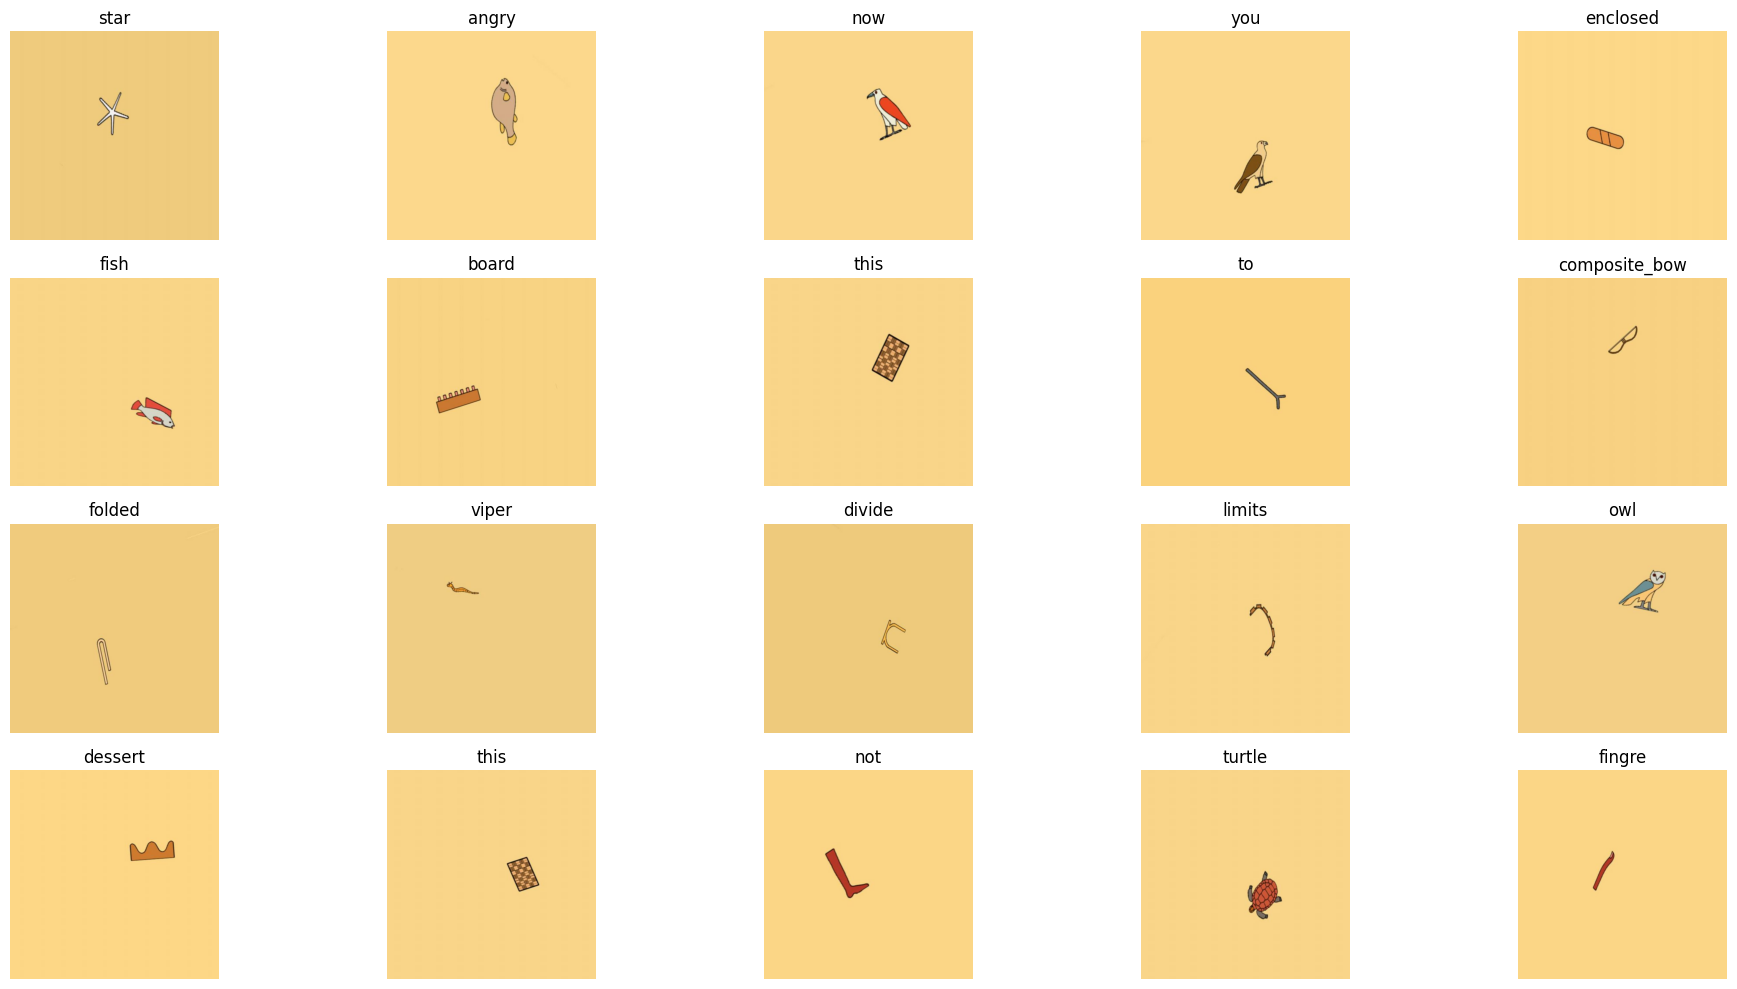

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def display_random_images(main_folder, num_images=20):
    class_folders = []
    for folder in ['train', 'test', 'valid']:
        folder_path = os.path.join(main_folder, folder)
        class_folders.extend(os.listdir(folder_path))

    selected_classes = random.sample(class_folders, min(num_images, len(class_folders)))

    plt.figure(figsize=(20, 10))

    for i, class_name in enumerate(selected_classes):
        class_folder_path = os.path.join(main_folder, 'train', class_name)

        image_files = [f for f in os.listdir(class_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

        if image_files:
            imaghelpe_file = random.choice(image_files)
            image_path = os.path.join(class_folder_path, image_file)
            img = Image.open(image_path)

            plt.subplot(4, 5, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(class_name)

    plt.tight_layout()
    plt.show()

main_folder = '/content/Egyptian Hieroglyphs'
display_random_images(main_folder)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset directories
base_dir = '/content/Egyptian Hieroglyphs'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data generators
valid_test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create generators for each dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 2723 images belonging to 92 classes.
Found 778 images belonging to 92 classes.
Found 419 images belonging to 92 classes.


# **CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Model Definition
def create_model(input_shape=(224, 224, 3), num_classes=None):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Compile Model
model = create_model(num_classes=len(train_generator.class_indices))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_acc')]
)

# Callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'best_hieroglyphics_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
]

# Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=callbacks
)

# Evaluate on test data
test_loss, test_accuracy, test_top5_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}, Test Top-5 accuracy: {test_top5_accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 88s 696ms/step - accuracy: 0.0311 - loss: 4.9759 - top5_acc: 0.1252 - val_accuracy: 0.0129 - val_loss: 4.6475 - val_top5_acc: 0.0746 - learning_rate: 1.0000e-04
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 50s 536ms/step - accuracy: 0.0998 - loss: 3.8255 - top5_acc: 0.3008 - val_accuracy: 0.0141 - val_loss: 4.7205 - val_top5_acc: 0.0617 - learning_rate: 1.0000e-04
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 580ms/step - accuracy: 0.1211 - loss: 3.4490 - top5_acc: 0.3839 - val_accuracy: 0.0193 - val_loss: 4.8986 - val_top5_acc: 0.0823 - learning_rate: 1.0000e-04
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 74s 490ms/step - accuracy: 0.1522 - loss: 3.1787 - top5_acc: 0.4612 - val_accuracy: 0.0463 - val_loss: 4.8143 - val_top5_acc: 0.1028 - learning_rate: 1.0000e-04
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 416ms/step - accuracy: 0.1843 - loss: 2.9727 - top5_acc: 0.5393 - val_accuracy: 0.0141 - val_loss: 5.0134 - val_top5_acc: 0.0938 - learning_rate: 1.0000e-04
Epoch 6/50
86/86

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Egyptian Hieroglyphs CNN Classification/hieroglyphics_modelCNN.keras')
print("Model saved successfully!")

Model saved successfully!


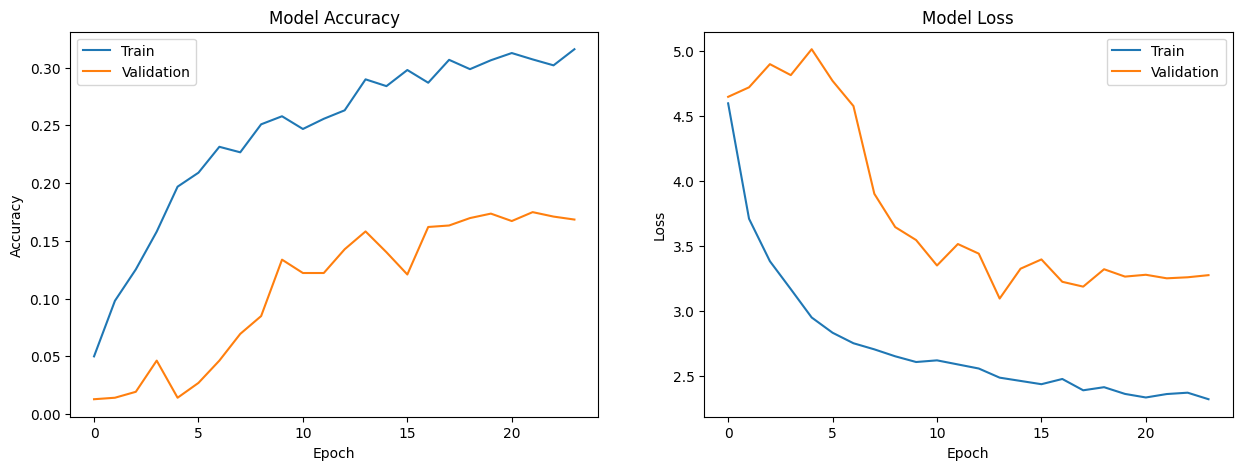

In [ ]:
# Plot training history for accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get the true labels from the test generator
test_labels = test_generator.classes
# Get the predicted labels
test_pred_probs = model.predict(test_generator)
test_pred_classes = np.argmax(test_pred_probs, axis=1)

# Print the classification report
print(classification_report(test_labels, test_pred_classes, target_names=list(test_generator.class_indices.keys())))


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step
               precision    recall  f1-score   support

          100       0.00      0.00      0.00         3
          Her       0.09      1.00      0.16         4
        Woman       0.00      0.00      0.00         3
        among       1.00      0.38      0.55         8
        angry       0.00      0.00      0.00         3
         ankh       0.20      0.50      0.29         2
       aroura       0.17      0.33      0.22         6
           at       0.00      0.00      0.00         3
          bad       0.00      0.00      0.00         6
      bandage       0.00      0.00      0.00         1
          bee       1.00      0.14      0.25         7
      belongs       0.00      0.00      0.00         8
        birth       0.00      0.00      0.00         5
        board       0.50      0.33      0.40         3
         book       0.17      1.00      0.29         1
          boy       0.00      0.00      0.00         1
       branch       0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#**VGG16 Model**

In [ ]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model
base_model.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])


In [ ]:
# Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_acc')]
)


In [ ]:
# Define Callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'best_hieroglyphics_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
]


In [ ]:
# Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=callbacks,
)


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 52s 567ms/step - accuracy: 0.1369 - loss: 4.2848 - top5_acc: 0.2835 - val_accuracy: 0.0746 - val_loss: 6.9066 - val_top5_acc: 0.2648 - learning_rate: 0.0010
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 72s 448ms/step - accuracy: 0.5168 - loss: 2.0064 - top5_acc: 0.8069 - val_accuracy: 0.3008 - val_loss: 3.3345 - val_top5_acc: 0.5720 - learning_rate: 0.0010
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 87s 509ms/step - accuracy: 0.7620 - loss: 1.0478 - top5_acc: 0.9406 - val_accuracy: 0.5604 - val_loss: 1.5781 - val_top5_acc: 0.8393 - learning_rate: 0.0010
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.8484 - loss: 0.6679 - top5_acc: 0.9735 - val_accuracy: 0.8213 - val_loss: 0.6253 - val_top5_acc: 0.9717 - learning_rate: 0.0010
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 508ms/step - accuracy: 0.8686 - loss: 0.5562 - top5_acc: 0.9843 - val_accuracy: 0.9113 - val_loss: 0.3377 - val_top5_acc: 1.0000 - learning_rate: 0.0010
Epoch 6/30
86/86 ━━━━━━━━

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Egyptian Hieroglyphs CNN Classification/hieroglyphics_modelVEGA16.keras')
print("Model saved successfully!")

Model saved successfully!


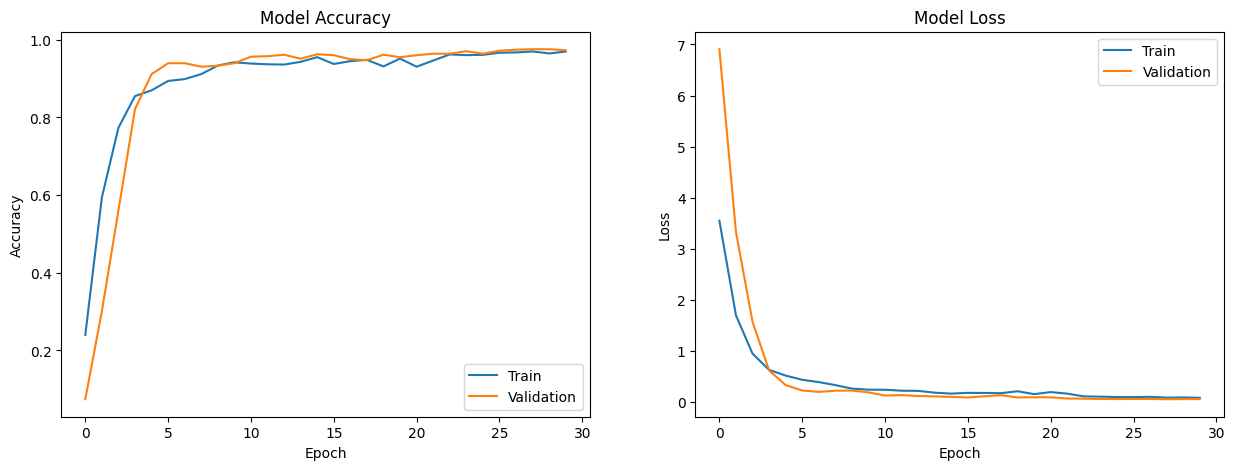

In [ ]:
# Plot Training History
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [ ]:
# Evaluate the Model
test_results = model.evaluate(test_generator)
print(f"\nTest Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Top-5 Accuracy: {test_results[2]:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.9886 - loss: 0.0377 - top5_acc: 1.0000

Test Loss: 0.0448
Test Accuracy: 0.9857
Test Top-5 Accuracy: 1.0000


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get predictions
test_steps = test_generator.samples // test_generator.batch_size + 1
predictions = model.predict(test_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division=0)
print(report)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step
               precision    recall  f1-score   support

          100       1.00      1.00      1.00         3
          Her       1.00      1.00      1.00         4
        Woman       1.00      1.00      1.00         3
        among       1.00      1.00      1.00         8
        angry       1.00      1.00      1.00         3
         ankh       1.00      1.00      1.00         2
       aroura       1.00      1.00      1.00         6
           at       1.00      1.00      1.00         3
          bad       1.00      1.00      1.00         6
      bandage       1.00      1.00      1.00         1
          bee       1.00      1.00      1.00         7
      belongs       1.00      1.00      1.00         8
        birth       1.00      1.00      1.00         5
        board       1.00      1.00      1.00         3
         book       1.00      1.00      1.00         1
          boy       1.00      1.00      1.00         1
       branch       1.0

# **MobileNetV2 Model**

In [ ]:
# Load a pre-trained model (MobileNetV2) with ImageNet weights
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Model Definition
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_acc')]
)

# TensorBoard Callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1)

# Callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'best_hieroglyphics_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    ),
    tensorboard_callback
]

# Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=callbacks
)

# Evaluate on test data
test_loss, test_accuracy, test_top5_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}, Test Top-5 accuracy: {test_top5_accuracy:.4f}')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 69s 628ms/step - accuracy: 0.0353 - loss: 4.6968 - top5_acc: 0.1123 - val_accuracy: 0.3303 - val_loss: 3.5875 - val_top5_acc: 0.6620 - learning_rate: 1.0000e-04
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 49s 546ms/step - accuracy: 0.2203 - loss: 3.5110 - top5_acc: 0.4802 - val_accuracy: 0.6491 - val_loss: 2.5101 - val_top5_acc: 0.9332 - learning_rate: 1.0000e-04
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 72s 422ms/step - accuracy: 0.4653 - loss: 2.6064 - top5_acc: 0.7540 - val_accuracy: 0.8406 - val_loss: 1.6085 - val_top5_acc: 0.9846 - learning_rate: 1.0000e-04
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 476ms/step - accuracy: 0.6260 - loss: 1.8361 - top5_acc: 0.8996 - val_accuracy: 0.8895 - val_loss: 1.0510 - val_top5_acc: 0.9987 - learning_rate: 1.0000e-04
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 482ms/step - accuracy: 0.7108 - loss: 1.3906 - top5_acc: 0.9456 - val_accuracy: 0.9280 - val_loss: 0.7461 - val_t

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Egyptian Hieroglyphs CNN Classification/hieroglyphics_modelMobileNetV2.keras')
print("Model saved successfully!")

Model saved successfully!


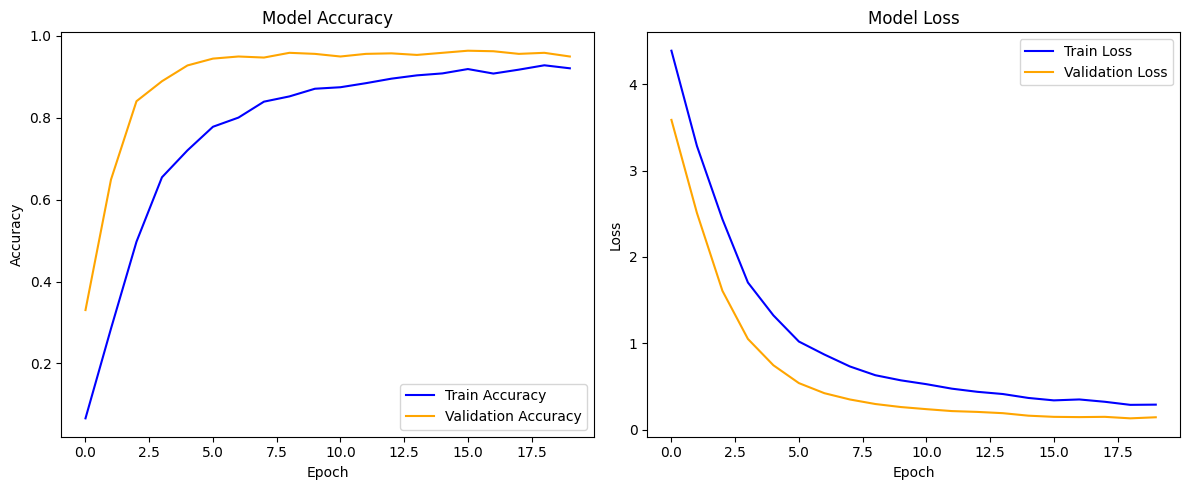

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Create a figure with subplots
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluate the model on the test data
test_loss, test_accuracy, test_top5_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}, Test Top-5 accuracy: {test_top5_accuracy:.4f}')

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9812 - loss: 0.1031 - top5_acc: 1.0000
Test accuracy: 0.9714, Test Top-5 accuracy: 1.0000
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step
               precision    recall  f1-score   support

          100       1.00      1.00      1.00         3
          Her       0.57      1.00      0.73         4
        Woman       1.00      1.00      1.00         3
        among       1.00      1.00      1.00         8
        angry       1.00      1.00      1.00         3
         ankh       1.00      1.00      1.00         2
       aroura       1.00      1.00      1.00         6
           at       1.00      1.00      1.00         3
          bad       1.00      1.00      1.00         6
      bandage       1.00      1.00      1.00         1
          bee       1.00      1.00      1.00         7
      belongs       1.00      1.00      1.00         8
        birth       1.00      1.00      1.00         5
        board       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#**License**

MIT License

**Copyright (c) 2024 Karim Mansor**

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.